This notebook is used to evaluate the quality of translator (i.e. score) between singleplex and mulitplex. <br>
Different types of translator (e.g. based on raw curves, norm curves, c parameter) are included in investigation.

# IMPORT LIBRARIES

In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
import python_libraries.score_processing as scorefunc
import python_libraries.plotting_function as plotfunc

In [18]:
NMETA = 50
# %matplotlib notebook

# LOAD DATA

In [19]:
data_path = f'{Path.cwd().parent}/data'
data_selected_path = f'{data_path}/20210716_7_plex'
path_fig = Path.cwd().parents[1]

## Select accuracy data

In [20]:
TEST_TYPE = 'kfold'
# TEST_TYPE = 'splited'

In [21]:
CURVE_TYPE = 'raw_rb'
# CURVE_TYPE = 'norm'

In [22]:
# PLEX_TYPE = '3_plex'
PLEX_TYPE = '7_plex'

In [23]:
df_accuracy = pd.read_csv(f'{data_selected_path}/M2M_data/df_accuracy.csv', index_col = 0)

## Select score data

In [24]:
curve_type_dict = {0: "raw_rb", 
                   1: "norm_curve",
                   2: "fitted_param",
                   3: "fitted_curve",
                   4: "norm_fitted_param",
                   5: "norm_fitted_curve",
                   6: 'c_param',
                   7: 'norm_c_param'}

In [25]:
# select the curve types based on the above dictionary information

selected_curve = 6
CURVE_TYPE = curve_type_dict[selected_curve]

In [26]:
### select data type: singleplex or multiplex data?
DATA_TYPE = 'singleplex'
# DATA_TYPE = 'multiplex'

### select the combination: all or selected?
# COMBO_TYPE = 'all'
COMBO_TYPE = 'selected'

In [27]:
df_score_singleplex_temp = pd.read_csv(f'{data_selected_path}/score_data/score_{CURVE_TYPE}_singleplex_{COMBO_TYPE}.csv', index_col = 0)
df_score_multiplex_temp = pd.read_csv(f'{data_selected_path}/score_data/score_{CURVE_TYPE}_multiplex_{COMBO_TYPE}.csv', index_col = 0)

df_score_singleplex = df_score_singleplex_temp[df_score_singleplex_temp['PrimerMix'].isin(df_accuracy.index)]
df_score_multiplex = df_score_multiplex_temp[df_score_multiplex_temp['PrimerMix'].isin(df_accuracy.index)]

## Select combinations

In [28]:
df_combination = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_selected.csv', index_col=0)
df_score_singleplex = df_score_singleplex_temp[df_score_singleplex_temp['PrimerMix'].isin(df_combination.index)]
df_score_multiplex = df_score_multiplex_temp[df_score_multiplex_temp['PrimerMix'].isin(df_combination.index)]

# SINGLEPLEX VERSUS MULTIPLEX

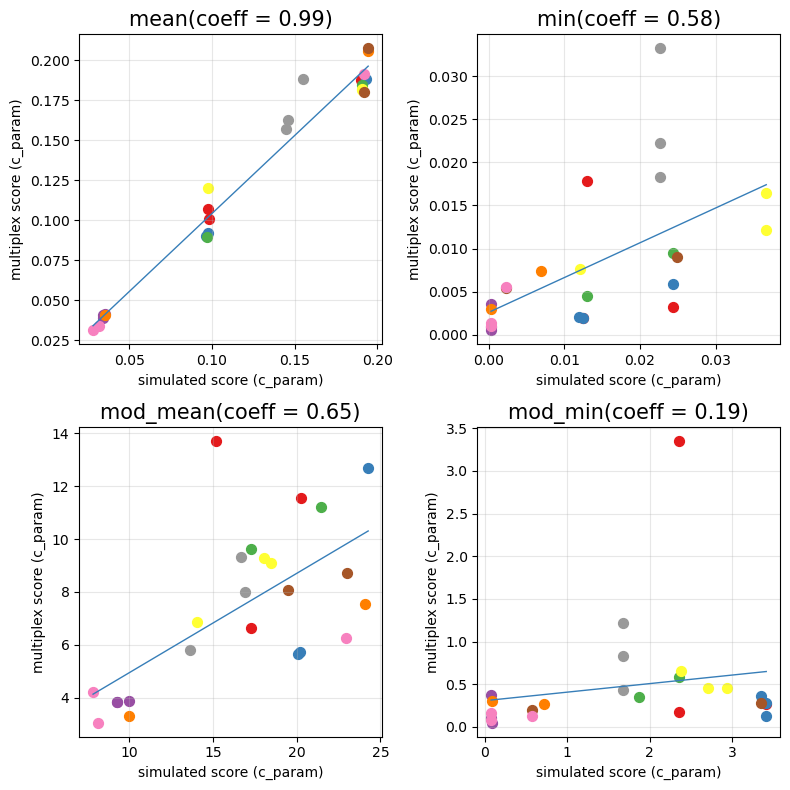

,0,1,2,3
Metric,mean,min,mod_mean,mod_min
Correlation coefficient,0.985813,0.577613,0.650233,0.192784


In [29]:
fig = plotfunc.scatter_plot_with_correlation_line(df_score_singleplex.iloc[:, NMETA:], df_score_multiplex.iloc[:, NMETA:],
                                            'multiple_single', col_number = 2, size = (8, 8), multi_color = True, x_label = 'simulated score (' + CURVE_TYPE + ')', y_label = 'multiplex score (' + CURVE_TYPE + ')',
                                            primer = df_score_multiplex['PrimerMix'].values, dot_size = 50)

scorefunc.generate_correlation_df_S2M(df_score_singleplex.iloc[:, NMETA:], df_score_multiplex.iloc[:, NMETA:])

In [20]:
markers = ["P", "*", "X", "p", "^"]
pm_types = ['TOP-ADS', 'BEST', 'TOP-MDS', 'MID', 'BOT']
colors = ['C02', 'C00', 'C04', 'C01', 'C03']

combo_top_ads = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_top_mean.csv')
combo_best = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_top_six.csv')
combo_top_mds = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_top_min.csv')
combo_mid = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_middle_six.csv')
combo_bot = pd.read_csv(f'{data_selected_path}/selected_combinations/assay_combinations_bottom_six.csv')

combo_index = [combo_top_ads['Label'].values, 
               combo_best['Label'].values, 
               combo_top_mds['Label'].values, 
               combo_mid['Label'].values, 
               combo_bot['Label'].values]

combo_index

[array(['PM7.2014', 'PM7.2302', 'PM7.2303'], dtype=object),
 array(['PM7.1286', 'PM7.1294', 'PM7.1430', 'PM7.2151', 'PM7.2155',
        'PM7.2295'], dtype=object),
 array(['PM7.4382', 'PM7.4441', 'PM7.4443'], dtype=object),
 array(['PM7.1176', 'PM7.1191', 'PM7.1318', 'PM7.1319', 'PM7.1339',
        'PM7.2203'], dtype=object),
 array(['PM7.1449', 'PM7.1451', 'PM7.1593', 'PM7.1595', 'PM7.2601',
        'PM7.2602'], dtype=object)]

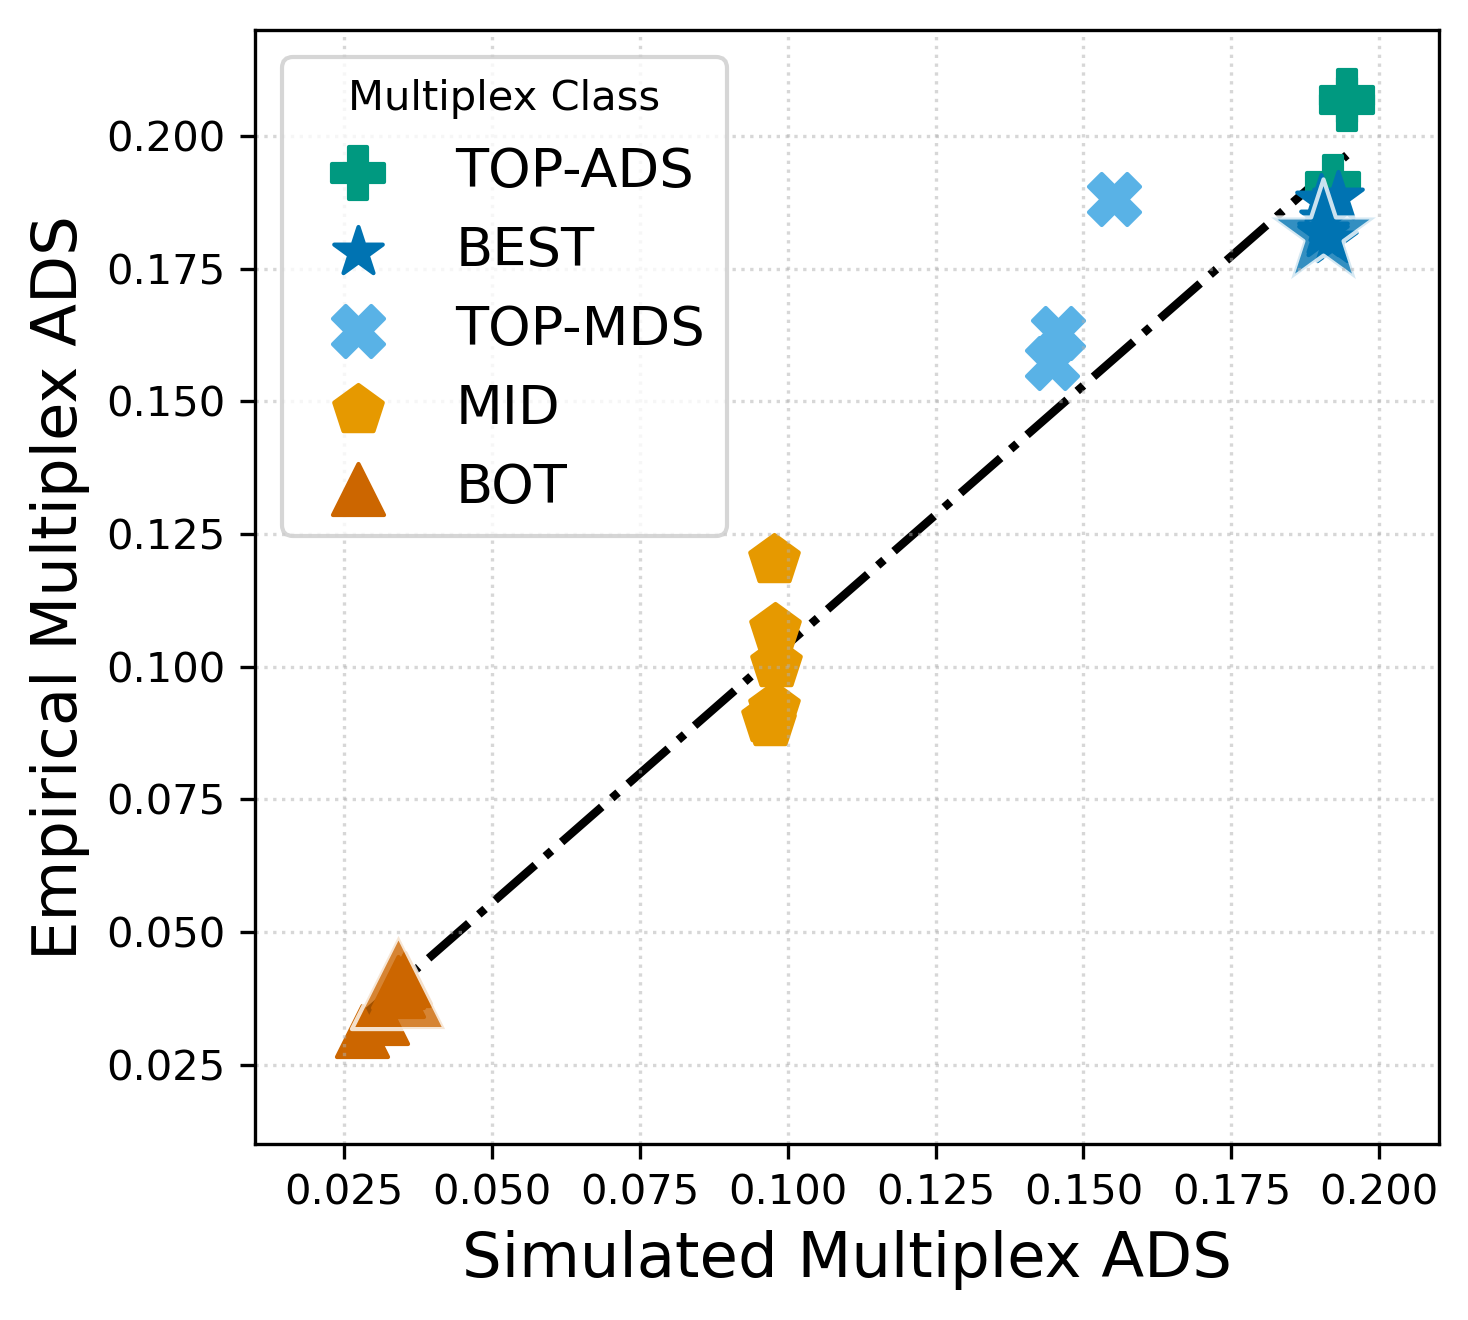

In [24]:
fig, ax = plt.subplots(1,1, figsize=(5,4.5), dpi=300)

x = df_score_singleplex['mean']
y = df_score_multiplex['mean']
X = x.values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

y_pred = np.sort(X, axis = 0).dot(reg.coef_) + reg.intercept_
ax.plot(np.sort(x.values), y_pred, color='black', lw=2, ls='-.', zorder=0)

for i, combo_idx in enumerate(combo_index):
    df_score_singleplex_ = df_score_singleplex_temp[df_score_singleplex_temp['PrimerMix'].isin(combo_idx)]
    df_score_multiplex_ = df_score_multiplex_temp[df_score_multiplex_temp['PrimerMix'].isin(combo_idx)]
    ax.scatter(df_score_singleplex_['mean'], df_score_multiplex_['mean'], s=150, 
               color=colors[i], marker=markers[i], label=pm_types[i], zorder=1)
    
ax.scatter(df_score_singleplex.loc[df_score_singleplex['PrimerMix']=='PM7.2151','mean'], 
           df_score_multiplex.loc[df_score_multiplex['PrimerMix']=='PM7.2151','mean'],
           s=700, color=colors[1], marker=markers[1], label='', zorder=1, alpha=0.8, edgecolors='white')

ax.scatter(df_score_singleplex.loc[df_score_singleplex['PrimerMix']=='PM7.1593','mean'], 
           df_score_multiplex.loc[df_score_multiplex['PrimerMix']=='PM7.1593','mean'],
           s=500, color=colors[4], marker=markers[4], label='', zorder=1, alpha=0.8, edgecolors='white')

ax.set_ylim(.01, 0.22)
ax.set_xlim(.01, 0.21)
ax.grid(alpha=0.5, ls=":")
ax.legend(fontsize=13, title='Multiplex Class')
ax.set_xlabel('Simulated Multiplex ADS', size=15)
ax.set_ylabel('Empirical Multiplex ADS', size=15)

plt.tight_layout()
plt.show()
fig.savefig(path_fig / "02_figures" / "figure5" / "c_param_ADS_corr.pdf")
plt.close()

In [106]:
df_score_multiplex

,PrimerMix,Assay1,Assay2,Assay3,Assay4,Assay5,Assay6,Assay7,Distance1,MDistance1,...,Distance19,MDistance19,Distance20,MDistance20,Distance21,MDistance21,mean,min,mod_mean,mod_min
0,PM7.1176,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_01,COC_N_02,COV_N_03,MER_N_04,0.102348,5.551582,...,0.034129,2.375481,0.098609,6.402245,0.064480,6.282354,0.100566,0.001988,6.637542,0.269527
1,PM7.1191,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_02,COC_N_01,COV_N_01,MER_N_03,0.109210,20.499555,...,0.063911,8.830282,0.046631,8.474048,0.110543,16.634173,0.107136,0.017893,13.711036,3.351361
2,PM7.1286,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_04,COC_N_04,COV_N_01,MER_N_02,0.074932,5.304269,...,0.294621,18.471874,0.394640,21.542498,0.100019,9.811668,0.187916,0.003204,11.554508,0.181183
3,PM7.1294,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_04,COC_N_04,COV_N_03,MER_N_02,0.083299,6.105635,...,0.330698,24.387428,0.374691,23.098191,0.043993,5.536001,0.188605,0.005923,12.676352,0.365623
4,PM7.1318,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_01,COC_N_02,COV_N_03,MER_N_02,0.104052,4.517135,...,0.054080,4.098731,0.006619,0.325970,0.060699,3.506683,0.092303,0.002052,5.641542,0.276643
5,PM7.1319,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_01,COC_N_02,COV_N_03,MER_N_03,0.108424,6.889333,...,0.039980,2.938204,0.001902,0.130969,0.041883,2.965845,0.090159,0.001902,5.713969,0.130969
6,PM7.1339,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_02,COC_N_01,COV_N_02,MER_N_03,0.104376,18.712313,...,0.023647,1.790259,0.045217,7.465349,0.068864,5.771571,0.089354,0.004468,9.627192,0.346775
7,PM7.1430,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_04,COC_N_04,COV_N_01,MER_N_02,0.083777,6.007267,...,0.256723,15.675531,0.361275,21.621106,0.104552,9.916013,0.184428,0.009535,11.227902,0.587093
8,PM7.1449,ADE_HEX_06,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_01,0.100484,7.567889,...,0.012994,1.101901,0.042645,5.529659,0.029651,3.596420,0.038943,0.003594,3.851892,0.376712
9,PM7.1451,ADE_HEX_06,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_03,0.103669,9.692596,...,0.005337,0.411449,0.050398,4.906315,0.045061,3.474280,0.041318,0.000843,3.829666,0.101581
